# Introduction to Scikit-learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library 
What we're going to cover: 
0. An end-to-end Scikit-Learn workflow 
1. Getting the data ready
2. Choosee the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictionis on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together! 

## 0. An end-to-end Scikit-Learn workflow 

In [3]:
import numpy as np

In [13]:
# 1. Get the data ready 
import pandas as pd 
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create X (features matrix) 
X = heart_disease.drop("target", axis=1)

# Create  y (labels) 
y = heart_disease["target"]

In [6]:
# 2. Choose the right Model and hyperparameters
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier() 

# We'll keep the defalt hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [152]:
# 3. Fit the model to the training data 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train);

In [13]:
# Make a prediction 
y_label = clf.predict(np.array([0,2,3,4]))

/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
y_preds = clf.predict(X_test) 
y_preds

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [9]:
y_test

151    1
146    1
282    0
1      1
133    1
      ..
33     1
299    0
82     1
271    0
93     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and the test data 
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.7868852459016393

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]])

In [14]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [28]:
# 5. Improve a model 
# Try different amount of n_estimators 

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}")
    print("")

Trying model with 10 estimators
Model accuracy on test set: 85.25

Trying model with 20 estimators
Model accuracy on test set: 90.16

Trying model with 30 estimators
Model accuracy on test set: 85.25

Trying model with 40 estimators
Model accuracy on test set: 86.89

Trying model with 50 estimators
Model accuracy on test set: 90.16

Trying model with 60 estimators
Model accuracy on test set: 90.16

Trying model with 70 estimators
Model accuracy on test set: 86.89

Trying model with 80 estimators
Model accuracy on test set: 90.16

Trying model with 90 estimators
Model accuracy on test set: 88.52



In [15]:
# 6. Save a model and load it 
import pickle 
pickle.dump(clf, open("random_forest_model_1.pk1","wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test, y_test)

0.7868852459016393

In [20]:
what_were_covering = [
    "1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictionis on our data",
"4. Evaluating a model",
"5. Improve a model",
"6. Save and load a trained model",
"7. Putting it all together!"]

In [19]:
what_were_covering

['Getting the data ready',
 'Choosee the right estimator/algorithm for our problems',
 'Fit the model/algorithm and use it to make predictionis on our data',
 'Evaluating a model',
 'Improve a model',
 'Save and load a trained model',
 'Putting it all together!']

In [10]:
# Standad imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning 
Three main things we have to do: 

    1. Split the data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing) or disregarding missing values 
    3. Converting non-umerical values to numerical values (also called feature encoding) 
    

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size =0.2)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [33]:
X.shape[0]*0.8

242.4

In [31]:
X.shape

(303, 13)

In [32]:
len(heart_disease)

303

### 1.1 Make sure its all numerical 

In [8]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
len(car_sales)

1000

In [39]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y=car_sales["Price"]

# Split into traning and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [41]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'

In [9]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] #going to treat doors as categorical - only 3 categories (also numerical)

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: A given column is not a column of the dataframe

In [46]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [48]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [51]:
dummies = pd.get_dummies(car_sales[["Make", "Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [54]:
# Let's refit the model 
np.random.seed(42) 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
model.score(X_test, y_test) #Converted data to be compleetely numerical - allow us to machine learning model on the data 

0.3235867221569877

### 1.2 What if there were missing values? 

1. Fill them with some value (also known as imputation).
2. Remove the samples with mising data altogether.


In [10]:
# Import car sales missing data 
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [11]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [14]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
                        

In [16]:
# Let's try and convert our data to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] #going to treat doors as categorical - only 3 categories (also numerical)

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [15]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas 

In [19]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna("missing", inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)


/var/folders/fv/b558m8zn5dx1tgtvdcr74kch0000gn/T/ipykernel_1510/335517718.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Doors"].fillna(4, inplace=True)


In [20]:
# Check our dataframe again 
car_sales_missing.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [21]:
# Remove rows with missing Price value 
car_sales_missing.dropna(inplace=True)

In [22]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [24]:
len(car_sales_missing) # Lost some data but all are filled 

950

In [27]:
X = car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [30]:
# Paste code from earlier: 
# Converted car_sales_missing data into numbers and fit model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] # going to treat doors as categorical - only 3 categories (also numerical)

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### Option 2: Fill missing values with Scikit-Learn

In [32]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(), len(car_sales_missing)

(     Make Colour  Odometer (KM)  Doors    Price
 0   Honda  White        35431.0    4.0  15323.0
 1     BMW   Blue       192714.0    5.0  19943.0
 2   Honda  White        84714.0    4.0  28343.0
 3  Toyota  White       154365.0    4.0  13434.0
 4  Nissan   Blue       181577.0    3.0  14043.0,
 1000)

In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
# Drop the rows with no labels 
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
# Split into X and y 
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [50]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [53]:
# Fill missing values with Scikit-Learn 
# Filling mussing values also called imputation 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 

# Fill categorical values with 'missing' & numerical values with mean 
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data) 
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data 
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [56]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make","Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [58]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [60]:
# Paste code from earlier: 
# Converted car_sales_missing data into numbers and fit model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"] # going to treat doors as categorical - only 3 categories (also numerical)

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [61]:
# Now we've got our data as numbers and filled (no missing values) 
# Let's fit a model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y,
                                                    test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)                       

0.21990196728583944

In [63]:
len(car_sales_filled), len(car_sales) # Less samples - more filled data but removed some rows 
# Score is worse with filled data because of less samples 

(950, 1000)

## 2. Choosing the right estimator/algorithm for your problem 

Some things to note: 

* Sklearn refers to machine learning models, algorithms as estimators.
* Classification problem - predicting a category (heart_disease or not)
*     Sometimes youll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

If you're working on a machine laerning problem and looking to use Sklearn and not sure what model you should use, refer to this map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem

Let's use the California housing dataset - https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [15]:
# Get California Housing dataset 
from sklearn.datasets import fetch_california_housing 
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [57]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [76]:
housing_df = housing_df.drop("MedHouseVal", axis=1)

In [81]:
# Import algorithm (go to scikit learn map!) 
from sklearn.linear_model import Ridge

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s 

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set) 
model.score(X_test, y_test)

# Coefficient of determiniation - how predictive are the features of the target value 

0.5758549611440126

In [85]:
# Try another one model and see if it improves score: 
# Import algorithm (go to scikit learn map!) 
from sklearn.linear_model import Lasso

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s 

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = Lasso()
model.fit(X_train, y_train)

#Check the score of the model (on the test set) 
model.score(X_test, y_test)

0.2841671821008396

What if `Ridge` didn't work or if the score didn't fit our needs? 

Well, we could always try a different model 

How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better predictions than just a single model)? 

Sklearn's ensemble models can be found here: https://scikit-learn.org/stable/modules/ensemble.html

Random forest explained: https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d

In [14]:
# Import the RandomForestRegressor model class from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

# Setup random seed 
np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model 
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model on the test set 
model.score(X_test, y_test)

NameError: name 'housing_df' is not defined

## 2.2 Picking a machine learning model for a classification problem 
Let's go to the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [88]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [89]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [97]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC(dual="auto")
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

0.8688524590163934

In [95]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [103]:
# Import the RandomForestClassifier  class
# Random Forest a good one! 
# If you have table data - use ensemble methods - works better 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(X_test, y_test)

0.8524590163934426

Tidbit: 

1. If you have structured data, use ensemble methods (table data) 
2. If you have unstructured data, use deep learning or transfer learning (images, text, audio)

## Fit the model/algorithm on our data and use it to make predictions 

### 3.1 Fitting the model to the data 

Different names for:
* X = features, feature variables, data
* y = labels, targets, target variables, ground truth

In [109]:
# Import the RandomForestClassifier  class 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Make the data 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Crux of all of machine learning here: fitting the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned) 
clf.score(X_test, y_test)

0.8524590163934426

In [106]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model 

2 ways to make predictions: 
1. `predict()`
2. `predict_proba()`

In [112]:
# Use a trained model to make predictions 
clf.predict((np.array([1,7,8,4,3]))) # This doesnt work... array shape not right 

/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 4. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [115]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [116]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

#### 3 different ways of evaluating with predict(): 

In [117]:
# Compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds ==y_test)

0.8524590163934426

In [118]:
clf.score(X_test, y_test)

0.8524590163934426

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds) 

0.8524590163934426

Make predictions with `predict_proba()`

In [127]:
# predict_proba() returns probabilities of a classification label 
clf.predict_proba(X_test[:5])

# Probability of the label being true: 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [129]:
# Let's predict() on the same data...
# Force the data to give us back one label
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [128]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [130]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression models 

In [131]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [138]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]


# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model instance 
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the data 
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [140]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [141]:
len(y_preds), len(y_test)

(4128, 4128)

In [143]:
# Compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test, y_preds) 
# On average - each one of models predictions is this far away from the mean: 

0.3265721842781009

In [145]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a machine learning model 

Three ways to evaluate Scikit-Learn models/estimators: 
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html


### 4.1 Evaluating a model with the `score` method

In [165]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance 
clf = RandomForestClassifier(n_estimators=2) # tweak number of estimators for different test scores below 

# Fit classifier to training data 
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [162]:
# The highest value for the .score() method is 1.0, lowest is 0.0
clf.score(X_train, y_train) 

1.0

In [163]:
clf.score(X_test, y_test) 
# If the test score is 100%, check your data - likely an error 

0.8524590163934426

Let's use the `score()` method on our regression problem: 

In [9]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create X & y 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Create train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance 
clf = RandomForestRegressor(n_estimators=100) # Number of estimators will change time it takes 

# Fit classifier to training data 
clf.fit(X_train, y_train)

NameError: name 'np' is not defined

In [176]:
# Score
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0, lowest = 0.0 
clf.score(X_test, y_test) 

0.8066883505926075

## 4.2 Evaluating a model using the `scoring` parameter

In [12]:
from sklearn.model_selection import cross_val_score

# Classifier code: 
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train/test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model instance 
clf = RandomForestClassifier() # tweak number of estimators for different test scores below 

# Fit classifier to training data 
clf.fit(X_train, y_train)


NameError: name 'heart_disease' is not defined

In [181]:
clf.score(X_test, y_test)

0.6885245901639344

In [185]:
cross_val_score(clf, X, y, cv=5)

array([0.73770492, 0.63934426, 0.70491803, 0.65      , 0.71666667])

#### Cross validation image explanation: 
Testing model on all of the data
<img src="cross_validation.png" size="50px"/>

In [189]:
np.random.seed(42)

# Single training and test split score 
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X,y,cv=5))

# Compare the two 
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [193]:
# Default scoring parameter of classifier = mean accuracy (see documentation)
clf.score(X_test, y_test)

0.8524590163934426

In [190]:
# Scoring parameter set to None by default 
cross_val_score(clf, X,y,cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2 Classification model evaluation metrics 

1. Accuracy 
2. Area under ROC curve 
3. Confusion matrix 
4. Classification report 

**Accuracy** 

In [201]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
from sklearn.model_selection import cross_val_score 

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [19]:
np.mean(cross_val_score)

0.8248087431693989

In [20]:
print(f"Heart Disease Clasifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Clasifier Cross-Validated Accuracy: 82.48%


**Area under reciever operating characteristic curve (AUC/ROC)**
* Area under curve (AUC) 
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a false positive rate (fpr) 

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 1 when truth is 0

In [24]:
# Create X_test.. etc 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.metrics import roc_curve 

# Fit the classifier 
clf.fit(X_train, y_train)
       
# Make predcitions with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.94, 0.06],
        [0.42, 0.58],
        [0.16, 0.84],
        [0.5 , 0.5 ],
        [0.25, 0.75],
        [0.24, 0.76],
        [0.32, 0.68],
        [0.07, 0.93],
        [0.99, 0.01],
        [0.  , 1.  ]]),
 61)

In [26]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.06, 0.58, 0.84, 0.5 , 0.75, 0.76, 0.68, 0.93, 0.01, 1.  ])

In [27]:
# Calculate fpr, tpr, and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
       0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ])

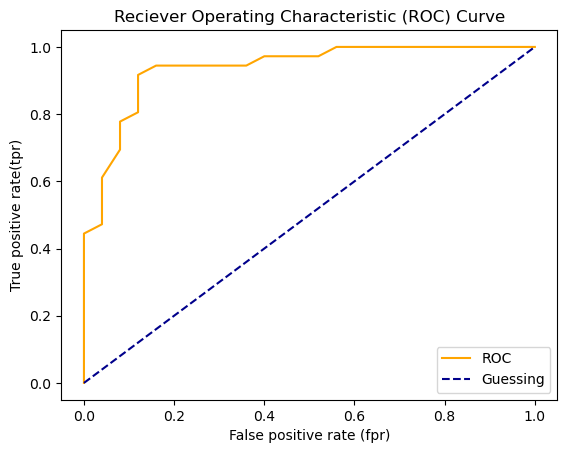

In [222]:
# Create a function for plotting ROC curves 
import matplotlib.pyplot as plt 
def plot_roc_curve(fpr, tpr): 
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot ROC curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot 
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9444444444444445

In [30]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

NameError: name 'plot_roc_curve' is not defined

In [31]:
# Perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix** 

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. 

In essence, giving you an idea of where the model is getting confused.

In [32]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds) 

array([[22,  3],
       [ 5, 31]])

In [33]:
# Visualize confusion matrix with pd.crosstab() 

pd.crosstab(y_test,
            y_preds, 
            rownames=["Actual Label"],
            colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Label,,
0,22,3
1,5,31


In [34]:
22 + 7 + 8 + 24 , len(X_test)

(61, 61)

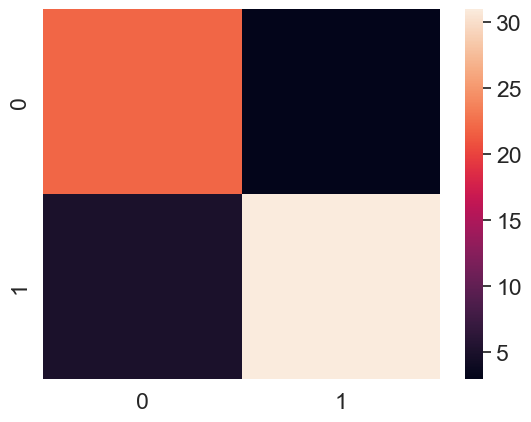

In [43]:
# Make our confusion matrix more visual with Seaborn's heatmap 
import seaborn as sns

# Set the fontscale 
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds) 

# Plot it using Seaborn 
sns.heatmap(conf_mat);

In [3]:
# HOW TO INSTALL module to conda within a jupyter notebook: 
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /Users/afkewolczyk/Documents/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.0.13             |       hca72f7f_1         4.6 MB
    seaborn-0.12.2             |  py312hecd8cb5_0         563 KB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-64::seaborn-0.12.2-py312hecd8cb5_0 

The following packages will be UPDATED:

  openssl                                 3.0.13-hca72f7f_0 --> 3.0.13-hca72f7f_1 



openssl-3.0.13       | 4.6 MB    |                                       |   0% 
openssl-3.0.13       | 4.6 MB    | ###############################6 

### Creating a confusion matrix using Scikit-Learn

To use the new methods of using a confusion matrix we need to install version 1.0+ 


In [38]:
import sklearn 
sklearn.__version__

'1.3.0'

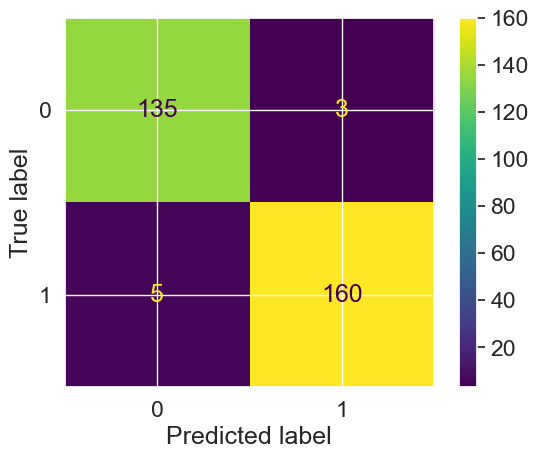

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

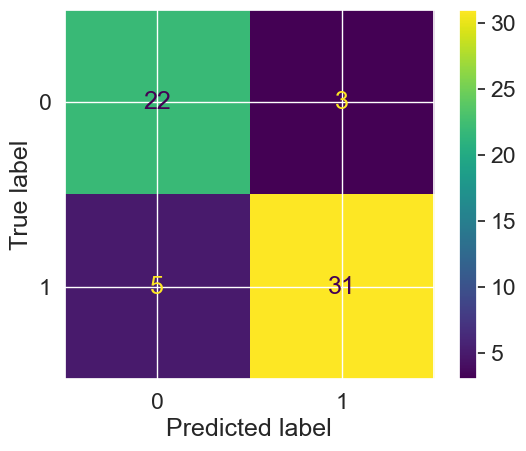

In [41]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

**Classification Report**

link to what each piece is: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [51]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case 

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True, zero_division=0))

# Large class imbalance - accuracy is not a good metric. Macro avg is low, 0 precision for positive result 
# Want to use a wide spectrum for classification metrics beyond accuracy 


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics: 
* **Accuracy** is a good measure to start with if all classes are balanced (eg. same amount of samples for each feature) 
* **Precision** and **recall** become more important when classes are imbalanced
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall. 



### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation = https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover are: 
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

What R^2 does: Compares your models prediction to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the man of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1. 


In [58]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train)


RandomForestRegressor()

In [59]:
model.score(X_test, y_test)

0.8066196804802649

In [61]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [63]:
y_test.mean()

2.0550030959302323

In [65]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())

In [66]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [71]:
r2_score(y_true=y_test,
        y_pred=y_test_mean)
# if all the mean - score is 1. still want a score closer to 1, and negative score possible 

0.0

In [69]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

**Mean absolute error(MAE)**

MAE is the average of the absolute differences between predictions and actual values. 

It gives you an idea of how wrong your models predictions are. 

In [74]:
# MAE 
from sklearn.metrics import mean_absolute_error 

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [75]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [76]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [78]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [82]:
# MAE using formulas and differences 
np.abs(df["differences"]).mean() 

0.3265721842781009

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [84]:
# Mean squared error 
from sklearn.metrics import mean_squared_error 

y_preds = model.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [86]:
df["squared differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [89]:
# Calculate MSE by hand 
squared = np.square(df["differences"])
squared.mean()

# MSE amplifies the large values 

0.2534073069137548

In [101]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared differences"]= 16
df_large_error.head()

/var/folders/fv/b558m8zn5dx1tgtvdcr74kch0000gn/T/ipykernel_27112/858212451.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared differences"]= 16


,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540290,0.354290,0.125521
9814,2.78000,2.331760,-0.448240,0.200919


In [102]:
df_large_error["squared differences"].mean()

0.25728320720794084

In [100]:
df_large_error.iloc[1:100]=20

Which regression metric should you use? 

* R^2 is similar to accuracy. IT gives you a quick indication of how well your mdoel is doing. Generally, the closer the value is to 1.0, the better the model. But it doesnt really tell you exactly how wrong your model is in terms of how far off each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between the predicted values and actual values, it amplifies larger differences.

### 4.2.3 Finally using the `scoring()` parameter

https://scikit-learn.org/stable/modules/model_evaluation.html

See scoring parameter on classification problem: 

In [104]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier 

np.random.seed(42)

X= heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [108]:
np.random.seed(42)

# Cross-validation accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) 
# If scoring=None , models default scoring method is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [109]:
# Cross-validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [111]:
# Using random seed because cross_val_score will chose the 5 folds randomly 
np.random.seed(42)

# Cross-validation accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy") 
# If scoring=None , models default scoring method is used (accuracy for classification models)
cv_acc

# Cross-validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [112]:
# Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [114]:
# Cross-validated precision 
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}%")

The cross-validated precision is: 0.83%


In [116]:
# Recall - our model does better on recall 
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [117]:
# Cross-validated recall 
print(f"The cross-validated recall is: {np.mean(cv_recall)}%")

The cross-validated recall is: 0.8424242424242424%


Let's see the `scoring` parameter being used for a regression problem...

scoring parameter - HIGHER is better. Convention for Sklearn. This is opposite for some eg. MSE 

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis=1)
y= housing_df["target"]
model = RandomForestRegressor(n_estimators=100)


In [123]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)

np.mean(cv_r2)

0.6545756342466266

In [124]:
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [128]:
# Mean absolute error 
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820332646560079

In [129]:
cv_mae

array([-0.51737186, -0.4219676 , -0.50676033])

In [131]:
# Mean squared error 
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.45772938854774403

In [132]:
cv_mse

array([-0.50635306, -0.33007243, -0.53676267])

## 4.3 Using different evaluation metrics as Scikit-Learn functions 

The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the `sklearn.metrics` module: 
https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
np.random.seed(42)

# Create X & y 
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model 
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions 
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions 
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)}%")
print(f"Precision: {precision_score(y_test, y_preds)}%")
print(f"Recall: {recall_score(y_test, y_preds)}%")
print(f"F1 score: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 0.8524590163934426%
Precision: 0.8484848484848485%
Recall: 0.875%
F1 score: 0.8615384615384615


In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

# Create X & y 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Create model 
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions 
y_preds= model.predict(X_test)

# Evaluate model using evaluation functions 
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8130661643722479
MAE: 0.32001366283914745
MSE: 0.24132319552673379


## 5. Improving a model 

First predictions = baseline predictions. 
First model = baseline model. 

From a data perspective: 
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective: 
* Is there a better model we can use? (eg. choosing the right estimator map)
* Could we improve the current model?

Parameters vs hyperparameters:
* Parameters = model find these patterns in data 
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters: 
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustivley with GridSearchCV 

In [146]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier() 
# To see hyperparameters: 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand 

Let's make 3 sets, training, validation and test. 

In [147]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust: 
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [158]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    on a classification model. 
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = { "accuracy": round(accuracy, 2),
                    "precision": round(precision, 2),
                    "recall": round(recall, 2),
                   "f1": round(f1, 2)} 
    print(f"Acc: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict
    

In [157]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"] 

# Split the data into train, validation, and test sets 
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data 
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15 % of the data 
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [163]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)

# Make baseline predictions 
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set 
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [155]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [164]:
np.random.seed(42)

# Create a second classifier with different hyperparameters 
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters 
y_preds_2 = clf_2.predict(X_valid) 

# Evaluate the second classifier 
clf_2_metrics  = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22
Precision: 0.84
Recall: 0.84
F1 score: 0.84


In [167]:
clf_3 = RandomForestClassifier(n_estimators=100, 
                              max_depth=10) 
# This takes too long. Look at Sklearn methods of tuning hyperparameters 

### 5.2 Hyperparameter tuning with RandomizedSearchCV 

In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth":[None, 5, 10, 20, 30],
        "max_features": ["sqrt", None],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1,2,4]}
np.random.seed(42)

# Split into X & y 
X = heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"] 

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # Number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf 
rs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages

In [176]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [179]:
# Make predictions with the best hyperparameters 
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions 
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV 

In [180]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [182]:
# GridSearchCV will go through all combinations of the grid: 
6*5*2*3*3*5
# Will take so long 

2700

In [183]:
# Use best params to influence the grid - reduce search samples 
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}


In [185]:
3*1*2*1*2*5

60

In [186]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Split into X & y 
X = heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"] 

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                            param_grid=grid_2, 
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf 
gs_clf.fit(X_train, y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/afkewolczyk/Documents/sample_project/env/lib/python3.12/site-packages

In [187]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [188]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds) 


Acc: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


Let's compare our differnet models metrics. 

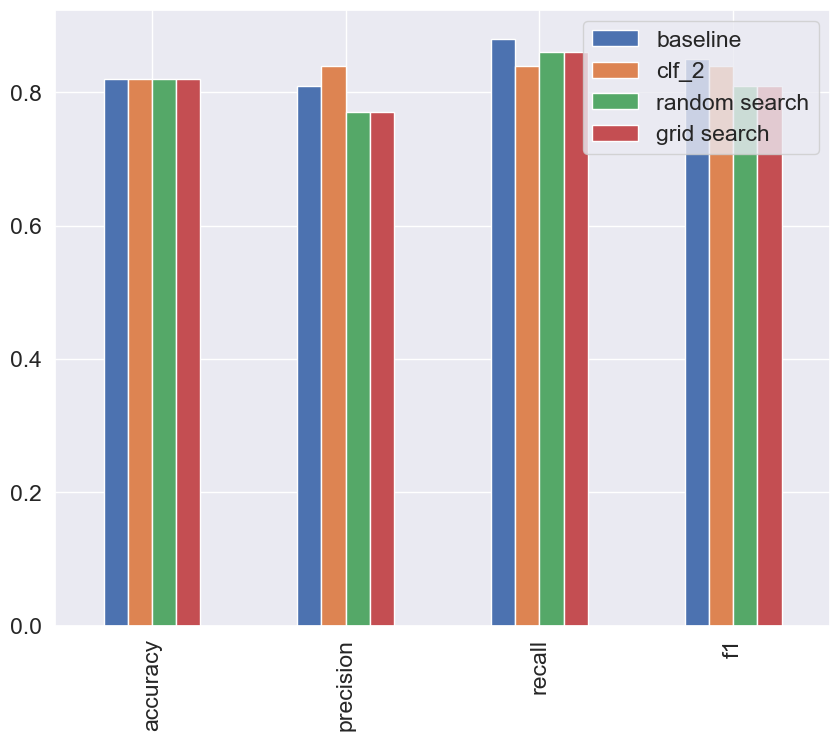

In [191]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8)); 

## 6. Saving and loading trained machine learning models 

Two ways to save and load machine learning models: 
1. With Python's `pickle`module
2. With the `joblib` module

**1. Pickle**

In [192]:
import pickle 

# Save an existing model to file 
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [193]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [194]:
# Make some predictions 
pickle_y_preds = loaded_pickle_model.predict(X_test)

evaluate_preds(y_test, pickle_y_preds)

Acc: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

**2.Joblib**
If model is large, may be more efficient to use Joblib. 

In [196]:
from joblib import dump, load

# Save odel to file 
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [199]:
# Import a saved joblib model 

loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [200]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)

evaluate_preds(y_test, joblib_y_preds)

Acc: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1': 0.81}

## 7. Putting it all together! 

In [210]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [202]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [204]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [205]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell): 
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data
   

In [211]:
# Getting data ready 
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed 
import numpy as np 
np.random.seed(42)

# Import data and drop rows with missing labels 
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data = data.dropna(subset=["Price"])

# Define different features and transformer pipeline 
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
     ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features= [ "Doors"] 
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill in missing values, then convert to numbers) 
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_features),
        ("num", numeric_transformer, numeric_features)
    ])

# Creating a preprocessing and modelling pipeline 
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y=data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model 
model.fit(X_train, y_train)
model.score(X_test, y_test) 


0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our`Pipeline`. 

In [213]:
# Use GridSearchCV with our regression Pipeline. 
# The following long keys with double underscores - strings at the front of the steps above 
from sklearn.model_selection import GridSearchCV 

pipe_grid={
    "preprocessor__num__imputer__strategy":["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features":["sqrt"],
    "model__min_samples_split": [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [215]:
gs_model.score(X_test, y_test) 

0.2848784564026805

In [216]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}